# ওপেনসিভি + পাইথনে ইমেজ প্রসেসিং
## বহুরূপী ইমেজ - ১ 

## ইমেজ আসলে কত রকমের হয়? অনেক রকমের। 

মনে আছে বলেছিলাম একটা ইমেজ বলতে গেলে একটা অতিকায় অ্যারে বাদে আর কিছুই না? এইবার একটা ছোট্ট ট্রিভিয়া। অ্যারে যখন আছে তাতে ভ্যালুও থাকবে । তাহলে অ্যারের প্রতি সেলে/ইলিমেন্টে কি থাকে? পিক্সেল ভ্যালু তাই না? তাহলে এই পিক্সেল ভ্যালু তো যাচ্ছেতাই ভ্যালু হতে পারে না । এর একটা রেঞ্জ থাকবে । কি সেই রেঞ্জ? রেঞ্জ টা কি ইউনিভার্সাল? 

### ইমেজ ডেপথ 

ধরা যাক, কোন ইমেজের জন্য পিক্সেল ভ্যালুর রেঞ্জ হচ্ছে ০ থেকে ২৫৫। অর্থাৎ যত যাই হোক না কেন, পিক্সেল ভ্যালু এর বাইরে যাবে না । সর্বনিম্ন ০ এবং সর্বোচ্চ ২৫৫।  

তাহলে ২৫৫ যদি আমার সর্বোচ্চ মান হয়, কম্পিউটার মেমোরিতে একেকটা পিক্সেল রাখতে আমার কয়টা বাইনারি বিট দরকার হবে? দশমিক থেকে বাইনারি কনভার্শন করলে সংখ্যাটা দাঁড়াবে (২^৮ - ১) = ২৫৫ । অর্থাৎ ২৫৫ কে ২ এর পাওয়ার হিসাবে দেখালে সেটা ২ এর ৮ নাম্বার পাওয়ারের কাছে থাকে । মানে হচ্ছে, আমার মেমোরিতে প্রতি পিক্সেলের জন্য ৮ বিট দরকার পড়বে । এ ধরণের ইমেজ যেখানে ইমেজের মানের রেঞ্জ ২ এর ৮ নাম্বার পাওয়ার পর্যন্ত (০ থেকে) তাদের আমরা বলি ৮ বিট ইমেজ । আর এই মেমোরিতে রাখতে কত বিট লাগে এটাকে বলে ইমেজ ডেপথ । 

এইটা কি ইউনিভার্সাল? মানে সব ধরণের ইমেজের জন্য একই রকম? উহু । একেক ইমেজের জন্য একেক রকম। এবং এই ইমেজ ডেপথ দিয়েও ইমেজ টাইপ আলাদা করা যায় । তাহলে ইমেজ ডেপথের উপর ভিত্তি করে প্রকারভেদ কেমন হতে পারে? 

- সাধারণ গ্রে স্কেল ইমেজ (যাদের আমরা প্রচলিত অর্থে সাদাকালো ছবি বলি) => ৮ বিট 
- বাইনারি ইমেজ (ফিচার ডিটেকশন, OMR, OCRইত্যাদি জায়গায় কাজে লাগে) => ২ বিট । (এই বেচারা গরিব, তার খালি ২ বিট নিয়েই কাজ করতে হয়, আর পিক্সেলের মান হয় ০ অথবা ১, আহারে!) 
- কালার ইমেজ (রঙ্গিন দুনিয়া ;) ) - ৮ থেকে ৩২ বিট। আমরা সাধারণত যেসব ডিসপ্লে স্ক্রিন ইউস করি , যেমন মোবাইল, কম্পিউটার, টেলিভিশন ইত্যাদিতে সর্বোচ্চ ৩২ বিট পর্যন্ত সাপোর্ট করে । (কালার ইমেজ ও ৮ বিট হতে পারে, তবে এর সাথে কিছু অতিরিক্ত ফিচার থাকে) 

##### এ পর্যায়ে এসে একটু ব্রেইনস্টোর্মিং - ৬৪ বিট ইমেজ তাহলে দেখবো ক্যামনে? ডিসপ্লে তো ৩২ এর বেশি সাপোর্ট করে না! 

## গ্রেস্কেল আসলে কতটা গ্রে, বাইনারি আসলে কতটা দুই রঙা? 

মুরুব্বিরা বলেন বিশ্বাসে মিলায় বস্তু, তর্কে বহুদূর। পাইথন স্ক্রিপ্ট লিখে এবার বাইনারি আর গ্রেস্কেল ইমেজ দেখাবো আপনাদের । এবং একই ইমেজের গ্রেস্কেল আর বাইনারি ভার্শন দেখবো যাবে তফাৎ টা আন্দাজ করতে পারেন। 

### গ্রেস্কেল 

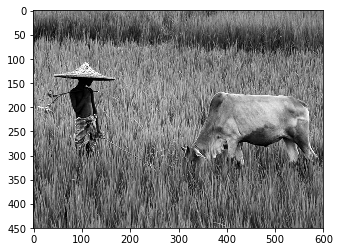

In [11]:
import cv2
import numpy as np

from matplotlib import pyplot as plt


imagePath = '../images/bangladesh.jpg'

# loading the image in grayscale mode

image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.show()

### বাইনারি 

এইখানে একটা ছোট্ট ঝামেলা আছে । চাইলেই যেকোন ইমেজ সরাসরি বাইনারি মোডে লোড করা যায় না । কনভার্ট করে নিতে হয় । এর জন্য দরকার পড়ে থ্রেশোল্ড বের করার । সেটা আমরা পরে একটা চ্যাপ্টারে দেখে নিবো । এখন কাজে নামি । 

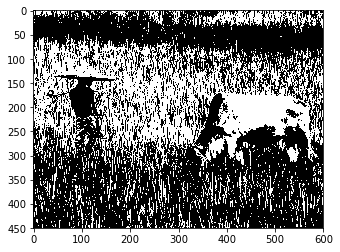

In [13]:
# loading the image in binary mode

temp, binaryImage = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binaryImage, cmap='gray')
plt.show()

### এতদিন কারে সাদাকালো বলতাম তাইলে? 

একটু মাথা চুলকাইয়া নেন। যাকে এতদিন সাদাকালো বলতেন টেকনিক্যালি সে আসলে সাদাকালো না । একেবারেই না। তাতে গ্রে সাহেবের অনেক শেড থাকে । Multiple Shades of Gray 🤓 

## হিস্টোগ্রাম 

এই যে নানাবিধ শেডের কথা বললাম, সেইটা দেখার উপায় কী? আপনি যদি স্ট্যাটিস্টিক্স নিয়ে কখনো ঘাটাঘাটি করে থাকেন তাহলে আপনার হিস্টোগ্রাম দিয়ে প্রোবাবিলিটি ডিস্ট্রিবিউশন কীভাবে দেখায় সেটা সম্পর্কে ধারণা থাকার কথা । আর ঘাটাঘাটি না করলেও সমস্যা নেই । ক্রিকেট খেলা তো দেখেন। সেখানে যে বার চার্ট দিয়ে রানরেট দেখায় সেটা নিশ্চয়ই দেখেছেন? সেখানে দেখবেন প্রতি ওভারে কত রান হল সেটা একটা রেঞ্জ ধরে চার্ট আকারে দেখানো হয় । জিনিসটা আদতে হিস্টোগ্রাম । আর ধূসর সাহেবের মাল্টিপল শেড দেখতে আপনাকে তার অখাদ্য সিনেমা দেখতে হবে না । হিস্টোগ্রাম চালালেই হবে । আবার পাইথন কোড - 

এজন্য আমাদের কিছু জিনিস লাগবে - numpy এর নিজের হিস্টগ্রাম ফাংশন, আর সবার বিশ্বস্ত pyplot

In [16]:
hist, bins = np.histogram(image.ravel(), 256, [0, 256])


এখানে, ফাংশন টা এভাবে কাজ করে , 
np.histogram(ইমেজ_ফাইল.ravel() নাম্পি এর নিজের ফাংশন, ইমেজ ডেপথ গ্রেস্কেলের জন্য ২৫৬ বা ৮ বিট, কোন রেঞ্জে প্লট করা হবে)

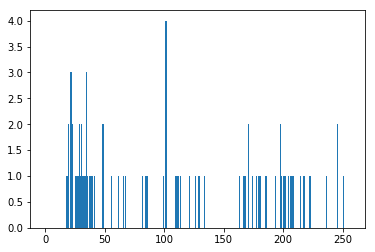

In [18]:
# plotting ..

plt.hist(hist, bins)
plt.show()

কোডে ভুল নাই তো? মানে ভুল ইমেজ লোড হয় নাই তো? চোখ কচলিয়ে নিতে পারেন, তাও মনের শান্তির জন্য আবার ইমেজ টা দেখাই 

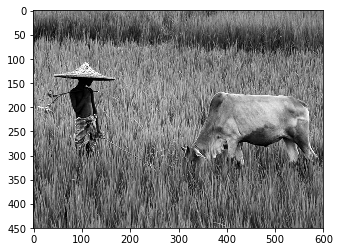

In [19]:
plt.imshow(image, cmap='gray')
plt.show()

তাহলে এতদিন যাকে সাদা কালো জানতেন সে কি আসলে সাদাকালো? টেকনিকাল টার্ম তো সব জায়গায় লাগে না । তাই সাদাকালো বলে চালিয়ে দেন । কে দেখতে আসছে? (যতক্ষণ পর্যন্ত না আপনি ইমেজ প্রসেসিং এ যাচ্ছেন আরকি 😁)

## এ অধ্যায়ের জন্য এখানে ইতি টানি । 

বাইনারি আর গ্রেস্কেল দিয়ে ইতিমধ্যে আপনাদের মাথা হ্যাং করে দিয়েছি। আজকের জন্য এখানে ইতি টানি , এই অধ্যায়ের সেকেন্ড পার্টে আর কিছু মাথা হ্যাং করা বিষয় নিয়ে আসবো । সেটা এই অধ্যায়ের ডিরেক্টরিতেই আরেকটা নোটবুকে থাকবে । 

আর আপনাদের জন্য খারাপ খবর - এই চ্যাপ্টার টা একটু লম্বা হবে । মানে ইমেজের প্রকারভেদের কাবজাব একটু বেশিই হবে। কষ্ট করে সয়ে নিয়েন। 

## যাওয়ার আগে একটা কুল ট্রিক , কোড থেকে ইমেজের রেজুলেশন দেখা 

ইমেজগুলো আবার লোড করি 

In [21]:
colorImg = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
grayImg = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)

print('For colorImg = ', colorImg.shape)
print('For grayImg  = ', grayImg.shape)

For colorImg =  (450, 600, 3)
For grayImg  =  (450, 600)


**পরের পার্টের জন্য টিজার ব্রেইনস্টোর্মিং => কালার ইমেজে অতিরিক্ত ৩ আসে কেন? ভাবতে থাকুন 😉**